In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

AxesSubplot(0.235366,0.125;0.554268x0.755)


,spatial_id,name,Total Households,Total Population,Median Household Income,geometry
0,5350001.00,"CT0001.00, Toronto, ON",249.0,600.0,79727.91,"POLYGON ((-79.30312052680827 43.6557792424362,..."
1,5350002.00,"CT0002.00, Toronto, ON",267.0,613.0,74505.79,POLYGON ((-79.34874705621597 43.63005940385361...
2,5350003.00,"CT0003.00, Toronto, ON",537.0,1557.0,88073.28,POLYGON ((-79.43442817686808 43.63362770070954...
3,5350004.00,"CT0004.00, Toronto, ON",3712.0,7177.0,27670.45,POLYGON ((-79.43602519603924 43.63716951121133...
4,5350005.00,"CT0005.00, Toronto, ON",3722.0,6969.0,33807.26,POLYGON ((-79.42457648823653 43.64104908625342...
5,5350006.00,"CT0006.00, Toronto, ON",0.0,0.0,0.00,POLYGON ((-79.43241604751883 43.63549278228854...
6,5350007.01,"CT0007.01, Toronto, ON",1892.0,3498.0,37613.16,"POLYGON ((-79.4301199122152 43.63619939920989,..."
7,5350007.02,"CT0007.02, Toronto, ON",2696.0,5112.0,29080.60,POLYGON ((-79.42572395914739 43.63410627057444...
8,5350008.00,"CT0008.00, Toronto, ON",NaN,NaN,NaN,None
9,5350008.01,"CT0008.01, Toronto, ON",5434.0,8228.0,90550.60,POLYGON ((-79.41083556987299 43.63923407801579...


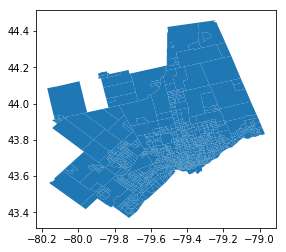

In [55]:
#import shapefile from Spatial Analytics
shapefile_SA = gpd.read_file("SA_shapefile.shp")
#Column labels taken from documentation provided with shapefile.
shapefile_SA.rename(columns={'VALUE0':'Total Households'}, inplace=True)
shapefile_SA.rename(columns={'VALUE1':'Total Population'}, inplace=True)
shapefile_SA.rename(columns={'VALUE2':'Median Household Income'}, inplace=True)
print(shapefile_SA.plot())
shapefile_SA

In [56]:
#move null geometry from shapefile_SA
shapefile_SA = shapefile_SA[pd.notnull(shapefile_SA['geometry'])]
shapefile_SA.head()

,spatial_id,name,Total Households,Total Population,Median Household Income,geometry
0,5350001.00,"CT0001.00, Toronto, ON",249.0,600.0,79727.91,"POLYGON ((-79.30312052680827 43.6557792424362,..."
1,5350002.00,"CT0002.00, Toronto, ON",267.0,613.0,74505.79,POLYGON ((-79.34874705621597 43.63005940385361...
2,5350003.00,"CT0003.00, Toronto, ON",537.0,1557.0,88073.28,POLYGON ((-79.43442817686808 43.63362770070954...
3,5350004.00,"CT0004.00, Toronto, ON",3712.0,7177.0,27670.45,POLYGON ((-79.43602519603924 43.63716951121133...
4,5350005.00,"CT0005.00, Toronto, ON",3722.0,6969.0,33807.26,POLYGON ((-79.42457648823653 43.64104908625342...


In [57]:
#import cleaned dataframe from Craiglist Housing
#df = pd.read_csv("craigslist_housing_cleaned.csv")
df = pd.read_csv("craigslist_housing_cleaned.csv", encoding = "ISO-8859-1")
df.head()

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,outlier,ppbed,pparea
0,6812910773,2100.0,4.0,3/07/2019,659000,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC,False,164750.0,313.809524
1,6812921890,950.0,2.0,3/07/2019,579000,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWNH...,False,289500.0,609.473684
2,6812934716,500.0,1.0,3/07/2019,465000,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,False,465000.0,930.000000
3,6813641313,1625.0,3.0,3/07/2019,471000,43.351751,-80.327754,cambridge,CAMBRIDGE- PRE-CONSTRUCTION FREEHOLD TOWNHOMES...,False,157000.0,289.846154
4,6813651847,525.0,1.0,3/07/2019,437000,43.589177,-79.646570,mississauga,MISSISSAUGA- PRE-CONSTRUCTION,False,437000.0,832.380952


In [58]:
#A GeoDataFrame needs a shapely object, so we create a new column Coordinates as a tuple of Longitude and Latitude :
df['coordinates']=list(zip(df.longitude, df.latitude))
#Then, we transform tuples to Point :
df['coordinates'] = df['coordinates'].apply(Point)
crs = {'init': 'epsg:4326'}
#Now, we can create the GeoDataFrame by setting geometry with the coordinates created previously.
gdf = gpd.GeoDataFrame(df, crs=crs,geometry='coordinates')
gdf.head()
#Source:http://geopandas.org/gallery/create_geopandas_from_pandas.html

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,outlier,ppbed,pparea,coordinates
0,6812910773,2100.0,4.0,3/07/2019,659000,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC,False,164750.0,313.809524,POINT (-79.836381 43.188546)
1,6812921890,950.0,2.0,3/07/2019,579000,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWNH...,False,289500.0,609.473684,POINT (-79.56723700000001 43.569182)
2,6812934716,500.0,1.0,3/07/2019,465000,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,False,465000.0,930.000000,POINT (-79.480574 43.626406)
3,6813641313,1625.0,3.0,3/07/2019,471000,43.351751,-80.327754,cambridge,CAMBRIDGE- PRE-CONSTRUCTION FREEHOLD TOWNHOMES...,False,157000.0,289.846154,POINT (-80.327754 43.351751)
4,6813651847,525.0,1.0,3/07/2019,437000,43.589177,-79.646570,mississauga,MISSISSAUGA- PRE-CONSTRUCTION,False,437000.0,832.380952,POINT (-79.64657 43.589177)


In [59]:
####Create GDF for all bedrooms count####
#sjoin to link data to neighborhoods
pointInPoly = gpd.sjoin(gdf, shapefile_SA, op='within') 

#aggregate overall data by neighborhood
tmp_ppbed = pointInPoly.groupby('name')['ppbed'].median()
tmp_pparea = pointInPoly.groupby('name')['pparea'].median()
tmp_bedrooms= pointInPoly.groupby('name')['bedrooms'].mean()
tmp_price= pointInPoly.groupby('name')['price'].median() #change median due to outliers

#join to shapefile
shapefile_SA_tmpa=shapefile_SA.merge(tmp_ppbed, on='name')
shapefile_SA_tmpa=shapefile_SA_tmpa.merge(tmp_pparea, on='name')
shapefile_SA_tmpa=shapefile_SA_tmpa.merge(tmp_bedrooms, on='name')
shapefile_SA_tmpa=shapefile_SA_tmpa.merge(tmp_price, on='name')
shapefile_SA_tmpa['listbdrmcount'] = 'all'

#Store in map_df2
shapefile_SA2 = shapefile_SA_tmpa

#Repeate for all bedroom counts
#for i in bedrooms:
#    #sjoin to link data to neighborhoods
#    pointInPoly = gpd.sjoin(gdf[gdf.bedrooms==i], map_df, op='within') 

    #aggregate overall data by neighborhood
#    tmp_ppbed = pointInPoly.groupby('AREA_NAME')['ppbed'].median()
#    tmp_pparea=pointInPoly.groupby('AREA_NAME')['ppAREA'].median()
#    tmp_bedrooms=pointInPoly.groupby('AREA_NAME')['bedrooms'].mean()

    #join to shapefile
#    shapefile_TO_tmp=shapefile_TO.merge(tmp_ppbed, on='AREA_NAME')
#    shapefile_TO_tmp=shapefile_TO_tmp.merge(tmp_pparea, on='AREA_NAME')
#    shapefile_TO_tmp=shapefile_TO_tmp.merge(tmp_bedrooms, on='AREA_NAME')
#    shapefile_TO_tmp['listbdrmcount'] = i
    
    #append to map_df2 
#    shapefile_TO2=shapefile_TO2.append(map_df_tmp)


#fill NA with 0's
shapefile_SA2['ppbed'].fillna(0, inplace=True)
shapefile_SA2['pparea'].fillna(0, inplace=True)
shapefile_SA2['bedrooms'].fillna(0, inplace=True)
shapefile_SA2['price'].fillna(0, inplace=True)
shapefile_SA2.crs = shapefile_SA.crs

shapefile_SA2 = gpd.GeoDataFrame(shapefile_SA2, crs=crs,geometry='geometry')
shapefile_SA2 = shapefile_SA2.to_crs({'init':'epsg:2019'})
#Convert CRS to MTM Zone 10 (https://epsg.io/7991)
# map_df = map_df.to_crs(epsg=7991)
gdf['coordinates']=gdf['coordinates'].to_crs(epsg=2019)

C:\Users\s2555246\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {})
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [60]:
#make Shapefile_SA CRS match neighbourhood SA and CL List CRS
crs = {'init': 'epsg:4326'}
shapefile_SA2 = gpd.GeoDataFrame(shapefile_SA, crs=crs,geometry='geometry')
shapefile_SA2 = shapefile_SA2.to_crs({'init':'epsg:2019'})
shapefile_SA2['geometry']=shapefile_SA2['geometry'].rotate(angle = -17, origin=(315000,4840000), use_radians=False)
shapefile_SA2.heas(10)

AttributeError: 'GeoDataFrame' object has no attribute 'heas'

In [ ]:
shapefile_SA2['geometry']=shapefile_SA2['geometry'].rotate(angle = -17, origin=(315000,4840000), use_radians=False)
shapefile_SA2.heas(10)

In [ ]:
#shapefile_SA2.to_csv( "Hapefile_Sa2_test.csv", index=False, encoding='utf-8-sig')

In [ ]:
shapefile_SA2.plot()

# Analysis Starts Here

AttributeError: 'GeoDataFrame' object has no attribute 'listbdrmcount'

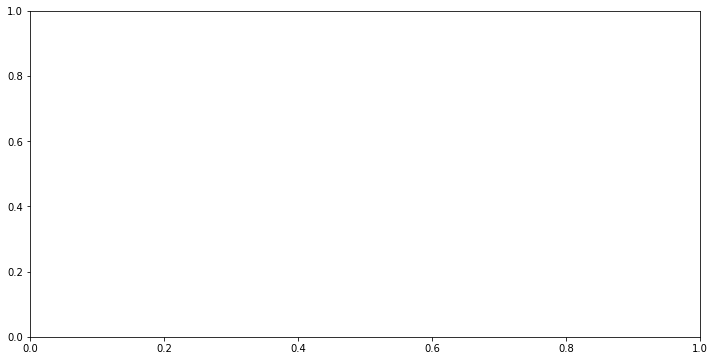

In [61]:
#plot all listings
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
shapefile_SA2[shapefile_SA2.listbdrmcount == 'all'].plot(ax=ax, color='gray',alpha = 0.4,)
sns.scatterplot("longitude", "latitude", data=gdf)
plt.show()